In [2]:
# Import libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# Define parameters
n = 100  # number of cities
m = 200  # number of ants
alpha = 1  # pheromone influence
beta = 2  # heuristic information influence
rho = 0.5  # evaporation rate
Q = 100  # pheromone deposit factor
max_iter = 100  # maximum number of iterations

# Generate random cities and distances
cities = np.random.rand(n, 2)  # x and y coordinates of each city
distances = np.zeros((n, n))  # distance matrix
for i in range(n):
    for j in range(i + 1, n):
        distances[i][j] = np.sqrt(np.sum((cities[i] - cities[j]) ** 2))  # euclidean distance
        distances[j][i] = distances[i][j]  # symmetric matrix

# Initialize pheromone matrix
pheromones = np.ones((n, n)) / n

# Define heuristic information matrix
eta = 1 / distances


# Define a function to calculate the tour length of an ant
def tour_length(ant):
    length = 0
    for i in range(n - 1):
        length += distances[ant[i]][ant[i + 1]]  # add the distance between consecutive cities
    length += distances[ant[n - 1]][ant[0]]  # add the distance from the last city to the first city
    return length


# Define a function to update the pheromone matrix
def update_pheromones(ants, lengths):
    global pheromones
    pheromones *= (1 - rho)  # evaporation
    for i in range(m):
        delta = Q / lengths[i]  # amount of pheromone deposited by each ant
        for j in range(n - 1):
            pheromones[ants[i][j]][ants[i][j + 1]] += delta  # update the pheromone between consecutive cities
            pheromones[ants[i][j + 1]][ants[i][j]] += delta  # symmetric update
        pheromones[ants[i][n - 1]][ants[i][0]] += delta  # update the pheromone from the last city to the first city
        pheromones[ants[i][0]][ants[i][n - 1]] += delta  # symmetric update


# Initialize the best tour and its length
best_tour = None
best_length = np.inf

# Main loop of the algorithm
for t in range(max_iter):
    # Initialize the ants and their tours
    ants = np.zeros((m, n), dtype=int)
    lengths = np.zeros(m)
    for i in range(m):
        ants[i] = np.random.permutation(n)  # random initial tour for each ant
        lengths[i] = tour_length(ants[i])  # calculate the tour length for each ant

    # Update the best tour and its length
    min_length = np.min(lengths)  # find the minimum tour length among all ants
    min_index = np.argmin(lengths)  # find the index of the ant with the minimum tour length
    if min_length < best_length:  # if the minimum tour length is better than the current best length
        best_length = min_length  # update the best length
        best_tour = ants[min_index]  # update the best tour

    # Print the iteration number and the best length so far
    print(f"Iteration {t + 1}: Best length = {best_length}")

    # Update the pheromone matrix based on the tours of all ants
    update_pheromones(ants, lengths)

    # Construct new tours for each ant using pheromone and heuristic information
    for i in range(m):
        unvisited = list(range(n))  # list of unvisited cities for each ant
        visited = [random.choice(unvisited)]  # list of visited cities for each ant, starting with a random city
        unvisited.remove(visited[0])  # remove the starting city from the unvisited list

        while unvisited:  # while there are still unvisited cities
            current = visited[-1]  # current city is the last visited city

            # Calculate the probability of moving to each unvisited city using pheromone and heuristic information
            probabilities = []
            for city in unvisited:
                probabilities.append(pheromones[current][city] ** alpha * eta[current][
                    city] ** beta)  # numerator of the probability formula
            probabilities /= np.sum(probabilities)  # denominator of the probability formula

            # Choose the next city using roulette wheel selection
            r = random.random()  # random number between 0 and 1
            cumsum = 0  # cumulative sum of probabilities
            for j, city in enumerate(unvisited):
                cumsum += probabilities[j]  # add the probability of the current city
                if r < cumsum:  # if the random number is less than the cumulative sum
                    next_city = city  # choose the current city as the next city
                    break

            # Append the next city to the visited list and remove it from the unvisited list
            visited.append(next_city)
            unvisited.remove(next_city)

        # Update the ant's tour with the new visited list
        ants[i] = visited

C:\Users\ains_sengly\AppData\Local\Temp\ipykernel_25036\3943280135.py:22: RuntimeWarning: divide by zero encountered in divide
  eta = 1 / distances


Iteration 1: Best length = 47.28228330877787
Iteration 2: Best length = 47.28228330877787
Iteration 3: Best length = 46.53920880599363
Iteration 4: Best length = 46.53920880599363
Iteration 5: Best length = 46.53920880599363
Iteration 6: Best length = 46.53920880599363
Iteration 7: Best length = 46.53920880599363
Iteration 8: Best length = 46.53920880599363
Iteration 9: Best length = 46.53920880599363
Iteration 10: Best length = 46.53920880599363
Iteration 11: Best length = 46.53920880599363
Iteration 12: Best length = 45.73830764987673
Iteration 13: Best length = 45.73830764987673
Iteration 14: Best length = 45.73830764987673
Iteration 15: Best length = 45.73830764987673
Iteration 16: Best length = 45.73830764987673
Iteration 17: Best length = 45.73830764987673
Iteration 18: Best length = 45.73830764987673
Iteration 19: Best length = 45.71242556499655
Iteration 20: Best length = 45.71242556499655
Iteration 21: Best length = 45.71242556499655
Iteration 22: Best length = 45.712425564996

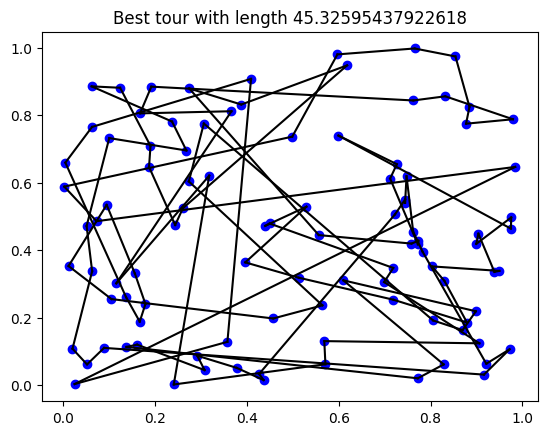

In [4]:

# Plot the best tour
plt.figure()
plt.scatter(cities[:, 0], cities[:, 1], color='blue')  # plot the cities as blue dots
for i in range(n - 1):
    plt.plot([cities[best_tour[i], 0], cities[best_tour[i + 1], 0]],
             [cities[best_tour[i], 1], cities[best_tour[i + 1], 1]],
             color='black')  # plot the edges between consecutive cities as black lines
plt.plot([cities[best_tour[n - 1], 0], cities[best_tour[0], 0]], [cities[best_tour[n - 1], 1], cities[best_tour[0], 1]],
         color='black')  # plot the edge from the last city to the first city as a black line
plt.title(f"Best tour with length {best_length}")  # add a title with the best length
plt.show()  # show the plot
